## Setup Environment

Required libraries: <br>

• TensorFlow (GPU version) – 2.3.0  <br>
• CUDA – 10.1 <br>
• CuDNN – v7.6.5.32 for CUDA 10.1  <br>
• Sklearn – 0.22.2.post1 <br>
• MLFlow – 1.10.0

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten 
from tensorflow.keras.datasets import mnist
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import sklearn
from sklearn.metrics import roc_auc_score 
import mlflow
import mlflow.tensorflow

In [2]:
print("TensorFlow: {}".format(tf.__version__))
print("Scikit-Learn: {}".format(sklearn.__version__))
print("Numpy: {}".format(np.__version__))
print("MLFlow: {}".format(mlflow.__version__))
print("Matplotlib: {}".format(matplotlib.__version__))

TensorFlow: 2.11.0
Scikit-Learn: 1.2.2
Numpy: 1.21.6
MLFlow: 2.2.2
Matplotlib: 3.7.1


Load the data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Class:  5


(<matplotlib.image.AxesImage at 0x29bebc100>, None)

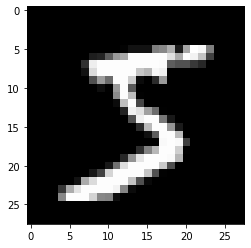

In [10]:
plt.imshow(x_train[0], cmap='gray'), print("Class: ", y_train[0])

Reshape Data and create labels

In [4]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],
x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],
x_test.shape[2], 1)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [5]:
print("Shapes")
print("x_train: {}\ny_train: {}".format(x_train.shape,y_train.shape))
print("x_test: {}\ny_test: {}".format(x_test.shape,y_test.shape))


Shapes
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)
x_test: (10000, 28, 28, 1)
y_test: (10000, 10)


## MLFlow Run - Training and Evaluating

Create Model

In [6]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, strides=2,padding='same', input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(filters=8, kernel_size=3, strides=2,padding='same', input_shape=(28, 28, 1), activation="relu"))
model.add(Flatten())
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 30)                11790     
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 13,940
Trainable params: 13,940
Non-traina

In [7]:
model.compile(optimizer="Adam",loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
mlflow.set_experiment("TF_Keras_MNIST") 

In [20]:
with mlflow.start_run():
    mlflow.tensorflow.autolog()
    model.fit(x=x_train, y=y_train, batch_size=256, epochs=10)
    preds = model.predict(x_test)
    preds = np.round(preds)
    eval_acc = model.evaluate(x_test, y_test)[1]
    auc_score = roc_auc_score(y_test, preds)
    print("eval_acc: ", eval_acc)
    print("auc_score: ", auc_score)
    mlflow.tensorflow.mlflow.log_metric("eval_acc", eval_acc)
    mlflow.tensorflow.mlflow.log_metric("auc_score", auc_score)
mlflow.end_run()

Epoch 1/10


NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_8' defined at (most recent call last):
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-15-3f5e8c5d0f71>", line 4, in <module>
      model.fit(x=x_train, y=y_train, batch_size=256, epochs=10)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/mlflow/utils/autologging_utils/safety.py", line 552, in safe_patch_function
      patch_function.call(call_original, *args, **kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/mlflow/utils/autologging_utils/safety.py", line 170, in call
      return cls().__call__(original, *args, **kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/mlflow/utils/autologging_utils/safety.py", line 174, in __call__
      return self._patch_implementation(original, *args, **kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/mlflow/utils/autologging_utils/safety.py", line 232, in _patch_implementation
      result = super()._patch_implementation(original, *args, **kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/mlflow/tensorflow/__init__.py", line 1236, in _patch_implementation
      history = original(inst, *args, **kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/mlflow/utils/autologging_utils/safety.py", line 535, in call_original
      return call_original_fn_with_event_logging(_original_fn, og_args, og_kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/mlflow/utils/autologging_utils/safety.py", line 470, in call_original_fn_with_event_logging
      original_fn_result = original_fn(*og_args, **og_kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/mlflow/utils/autologging_utils/safety.py", line 532, in _original_fn
      original_result = original(*_og_args, **_og_kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_8'
could not find registered platform with id: 0x106abd860
	 [[{{node StatefulPartitionedCall_8}}]] [Op:__inference_train_function_1359]

In [8]:
model.fit(x=x_train, y=y_train, batch_size=256, epochs=10)

Epoch 1/10


NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_8' defined at (most recent call last):
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-8-3b4b6a6b2bb6>", line 1, in <module>
      model.fit(x=x_train, y=y_train, batch_size=256, epochs=10)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/alimokh/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_8'
could not find registered platform with id: 0x107996030
	 [[{{node StatefulPartitionedCall_8}}]] [Op:__inference_train_function_1343]

In [1]:
import tensorflow as tf
print(tf.__version__)

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: initialization failed